
# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project i will be analyzing data associated with 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

>My Question is: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [8]:
df = pd.read_csv('./noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [9]:
df.shape

(110527, 14)

In [10]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
 >I found that the data type of PatientId is float64, so i change it to int64, the type of AppointmentDay is String, so i convert it to datatime. 
 >

In [12]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['PatientId'] = df['PatientId'].astype(np.int64)

> I found that some patients made appointment at the same time also at the same hospital. So i think these are duplicated date even though maybe they have different No-show value

In [13]:
df[df.duplicated(subset=['PatientId', 'AppointmentDay', 'Neighbourhood'], keep=False)]['AppointmentID'].count()

16200

>Drop duplicates.

In [14]:
df.drop_duplicates(subset=['PatientId', 'AppointmentDay', 'Neighbourhood'], keep=False, inplace=True)

> Rename column No-show to NoShow and SMS_received to SMSReceived for convenient operation

In [15]:
df.rename(index=str, columns={'No-show': 'NoShow', 'SMS_received':'SMSReceived'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94327 entries, 3 to 110526
Data columns (total 14 columns):
PatientId         94327 non-null int64
AppointmentID     94327 non-null int64
Gender            94327 non-null object
ScheduledDay      94327 non-null object
AppointmentDay    94327 non-null datetime64[ns]
Age               94327 non-null int64
Neighbourhood     94327 non-null object
Scholarship       94327 non-null int64
Hipertension      94327 non-null int64
Diabetes          94327 non-null int64
Alcoholism        94327 non-null int64
Handcap           94327 non-null int64
SMSReceived       94327 non-null int64
NoShow            94327 non-null object
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 10.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

In [16]:
# Create masks for easier graping rows in the future
show = df.NoShow == 'No'
noShow = df.NoShow == 'Yes'

### Research Question 1 : To see if show up is related to SMS_received
>observations : No correlation. 

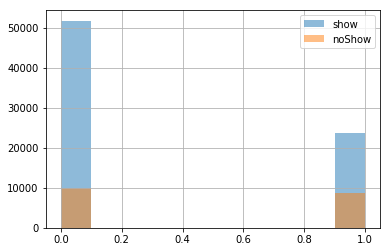

In [17]:
df.SMSReceived[show].hist(alpha=0.5, label='show')
df.SMSReceived[noShow].hist(alpha=0.5, label='noShow')
plt.legend();

### Research Question 2 : To see if show up is related to 
>observations : No correlation.

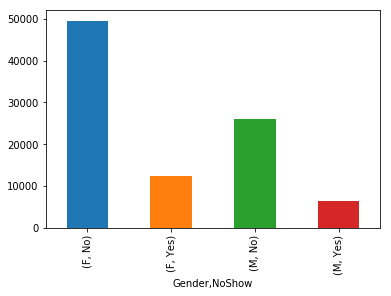

In [18]:
df.groupby('Gender')['NoShow'].value_counts().plot(kind='bar');

### Research Question 3 :  To see if show up is related to Age
>observations : No correlation. 

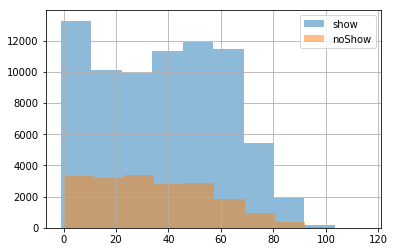

In [31]:
df.Age[show].hist(alpha=0.5, label='show')
df.Age[noShow].hist(alpha=0.5, label='noShow')
plt.legend();

### Research Question 4 : To see if show up is related to Scholarship
>observations : Patient without scholarship show up often.

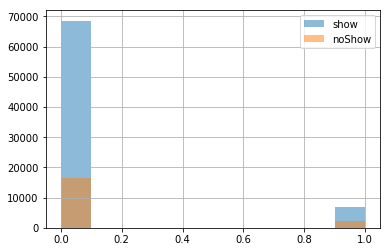

In [32]:
df.Scholarship[show].hist(alpha=0.5, label='show')
df.Scholarship[noShow].hist(alpha=0.5, label='noShow')
plt.legend();

<a id='conclusions'></a>
## Conclusions

> The data i explored has removed the rows with same patientid, appointmentday, and neighbourhood.
> Only Patient without scholarhip show up often.